# Multi-Layer Perceptron (MLP), MNIST
---
<font color='cyan'> Responsible TA: AmirHossein Razlighi </font>

In this notebook, we will train an MLP to classify images from the [MNIST database](http://yann.lecun.com/exdb/mnist/) hand-written digit database.

This is a well-known and famous problem in the machine learning community! We try to train our network to recognize handwritten digits from 0 to 9. We use the famous MNIST dataset for this purpose. The dataset contains 60,000 training images and 10,000 testing images. Each image is a 28x28 grayscale image. We will use the MLP to classify the images.

Let's proceed with the excersise!

In [1]:
# Run this code if you are trying to run the notebook locally
!python3 -m venv ./venv
!source ./venv/bin/activate

Error: Command '['/content/venv/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
/bin/bash: ./venv/bin/activate: No such file or directory


In [2]:
%pip install torch numpy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import torch
import numpy as np

---
## Load and Visualize the [Data](http://pytorch.org/docs/stable/torchvision/datasets.html)

In this cell we first, download the dataset (using torch datasets) and then, create the test_set and train_sets to use in the rest of our notebook.
You can also change the `batch_size` in this cell to your desired amount.

In [4]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 64

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 141559877.17it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 36965423.81it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 44292887.13it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 16829089.02it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## See some of the training images

First thing to do in any machine learning task is to look at your data! load a batch of images from the training set and display them in a grid using the `imshow` function from `matplotlib.pyplot`. You can also use `torchvision.utils.make_grid` to create a grid from a list of images (batch).

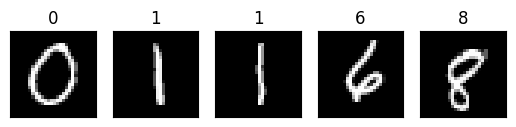

In [5]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torchvision
%matplotlib inline

# obtain one batch of training images
# just like https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#iterate-through-the-dataloader
# and https://pytorch.org/vision/stable/auto_examples/plot_visualization_utils.html#visualization-utilities

train_features, train_labels = next(iter(train_loader))
grid = make_grid(train_features.squeeze())[:5] # First 5 images for better view point
fig, axs = plt.subplots(ncols=5, squeeze=False)
for i, img in enumerate(grid):
  img = img.detach()
  axs[0, i].imshow(np.asarray(img), cmap='gray')
  axs[0, i].set_title(int(train_labels[i]))
  axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

## View an Image in More Detail

Here, we look at one sample in a batch to see the pixel values (intensities). Note that our images are grayscale (even if the dataset were in RGB, the color data was irrelevant!) because for detecting the handwritten digits, the color of the ink of pen is not important (obviously)!

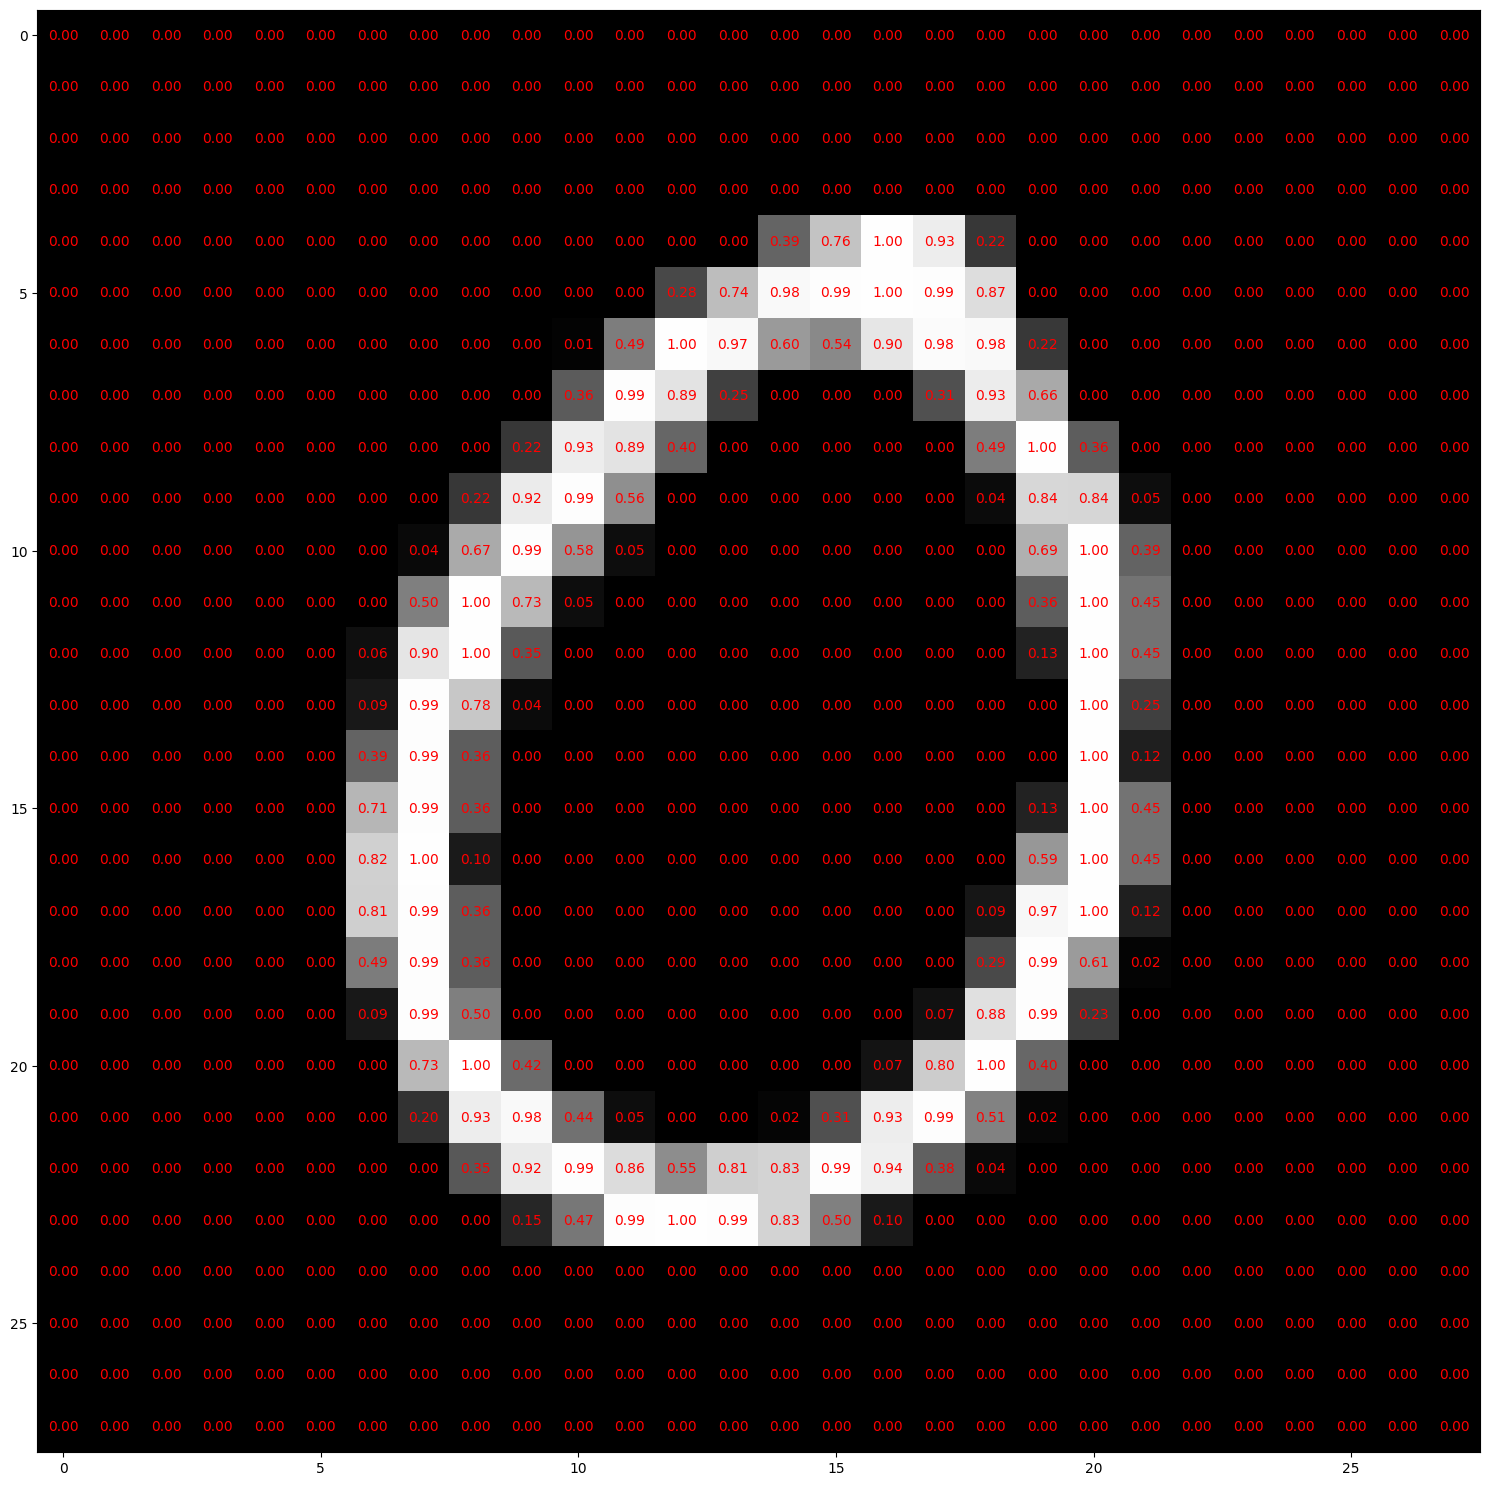

In [6]:
# You can round the pixel values with 2 floating point precision for better visualization!
# From https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
# https://www.tutorialspoint.com/how-to-change-the-scale-of-imshow-in-matplotlib-without-stretching-the-image
plt.rcParams["figure.figsize"] = [15, 15]
plt.rcParams["figure.autolayout"] = True
img = train_features[0].squeeze()
plt.imshow(img, cmap='gray')
for i in range(len(img)):
  for j in range(len(img[0])):
    plt.text(j, i, "%.2f" % float(img[i, j]), ha="center", va="center", color="red")
plt.tight_layout()
plt.show()

---
## Define the Network [Architecture](http://pytorch.org/docs/stable/nn.html)

In this cell, you should define the network architecture. Note the dimensions of the input (print it out!) and the outputs. Your output should be a tensor of length 10 (digits 0 to 9) that indicates scores (probabilities) for an input image belonging to that class [$P(C_i|x)$]. Use `Drop out` layers to avoid overfitting!

In [7]:
import torch.nn as nn
# From https://sebarnold.net/tutorials/beginner/examples_nn/two_layer_net_module.html
# and https://www.geeksforgeeks.org/create-model-using-custom-module-in-pytorch/
# and https://www.phind.com/search?cache=e9389512-e52f-4a75-9ea4-11dbc0e043c1
# I used the parameters printed to define the hidden layers

## Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear1 = torch.nn.Linear(784, 512, bias=True)
        self.linear2 = torch.nn.Linear(512, 512, bias=True)
        self.linear3 = torch.nn.Linear(512, 10, bias=True)
        self.dropout = nn.Dropout(p = 0.2)

    def forward(self, input):
        # Input is the picture so we flatten it just like before
        input = input.view(-1, 784)
        layer1 = nn.functional.relu(self.linear1(input))
        layer1 = self.dropout(layer1)
        layer2 = nn.functional.relu(self.linear2(layer1))
        layer2 = self.dropout(layer2)
        layer3 = self.linear3(layer2)
        return layer3

# initialize the NN
model = Net()
print(model)

Net(
  (linear1): Linear(in_features=784, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


##  Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

Here you should define the loss function used in training process and the optimizer. We recommend you use `cross-entropy` loss. But you can explore other loss functions if you think they work better in this case! Also, you can use `SGD` or `Adam` optimizer, or any other optimizers that you think would work better!

In [8]:
# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

---
## Train the Network

The steps for training/learning from a batch of data are described in the comments below:
1. Clear the gradients of all optimized variables
2. Forward pass: compute predicted outputs by passing inputs to the model
3. Calculate the loss
4. Backward pass: compute gradient of the loss with respect to model parameters
5. Perform a single optimization step (parameter update)
6. Update average training loss

Complete the code below:

In [9]:
# Mostly from https://www.geeksforgeeks.org/create-model-using-custom-module-in-pytorch/
# number of epochs to train the model
n_epochs = 20  # suggest training between 20-50 epochs

for epoch in range(n_epochs):
  for images, labels in train_loader:
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
  print(f"Epoch {epoch}\t Loss: {loss}")

Epoch 0	 Loss: 0.7705754041671753
Epoch 1	 Loss: 0.39865854382514954
Epoch 2	 Loss: 0.26903337240219116
Epoch 3	 Loss: 0.23223064839839935
Epoch 4	 Loss: 0.35848987102508545
Epoch 5	 Loss: 0.2205287367105484
Epoch 6	 Loss: 0.3396598994731903
Epoch 7	 Loss: 0.20718011260032654
Epoch 8	 Loss: 0.16012316942214966
Epoch 9	 Loss: 0.15842469036579132
Epoch 10	 Loss: 0.1119285449385643
Epoch 11	 Loss: 0.07115050405263901
Epoch 12	 Loss: 0.15245676040649414
Epoch 13	 Loss: 0.3174237310886383
Epoch 14	 Loss: 0.24786429107189178
Epoch 15	 Loss: 0.08079910278320312
Epoch 16	 Loss: 0.1595086008310318
Epoch 17	 Loss: 0.04227776825428009
Epoch 18	 Loss: 0.07066216319799423
Epoch 19	 Loss: 0.027400989085435867


---
## Test the Trained Network

And at last, you should test the model on test_set (previously unseen data). We will use test_set to evaluate the model's performance. Don't forget to prepare the model for evaluation(testing) using `model.eval()` in Pytorch!

You should report the Test Accuracy of your model.

In [10]:
model.eval()
total_images = 0
total_correct = 0
for images, labels in test_loader:
  output_probs = model(images)
  _, predicted = torch.max(output_probs, 1)
  total_images += labels.shape[0]
  total_correct += (predicted == labels).sum()
print(f"Accurecy: {total_correct/total_images*100}")

Accurecy: 96.4000015258789


### Visualize Sample Test Results

This cell displays test images and their labels in this format: `predicted (ground-truth)`. The text will be green for accurately classified examples and red for incorrect predictions.

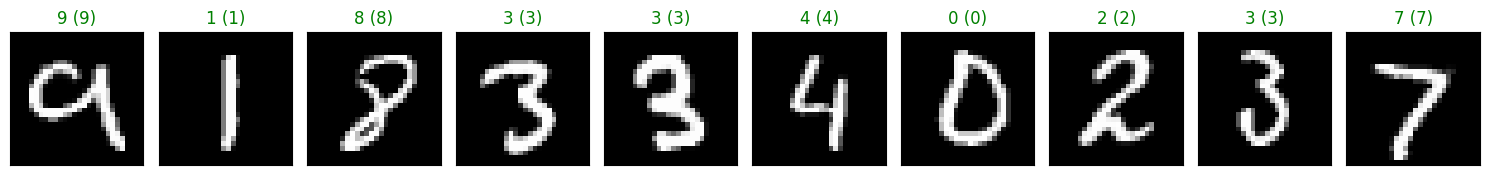

In [13]:
# obtain one batch of test images
images, labels = next(iter(test_loader))

# get sample outputs
output_probs = model(images)
_, predicted = torch.max(output_probs, 1)

# plot the images in the batch, along with predicted and true labels
grid = make_grid(images.squeeze())[:10] # First 10 images for better view point
fig, axs = plt.subplots(ncols=10, squeeze=False)
for i, img in enumerate(grid):
  img = img.detach()
  axs[0, i].imshow(np.asarray(img), cmap='gray')
  axs[0, i].set_title(f"{int(predicted[i])} ({int(labels[i])})", color="green" if int(predicted[i]) == int(labels[i]) else "red")
  axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])